In [2]:
#import librarires
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"]=(10,5)
plt.rcParams["figure.dpi"]=250
sns.set_style("darkgrid")
%matplotlib inline


In [3]:
df = pd.read_csv("/content/Cars.csv")
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [4]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


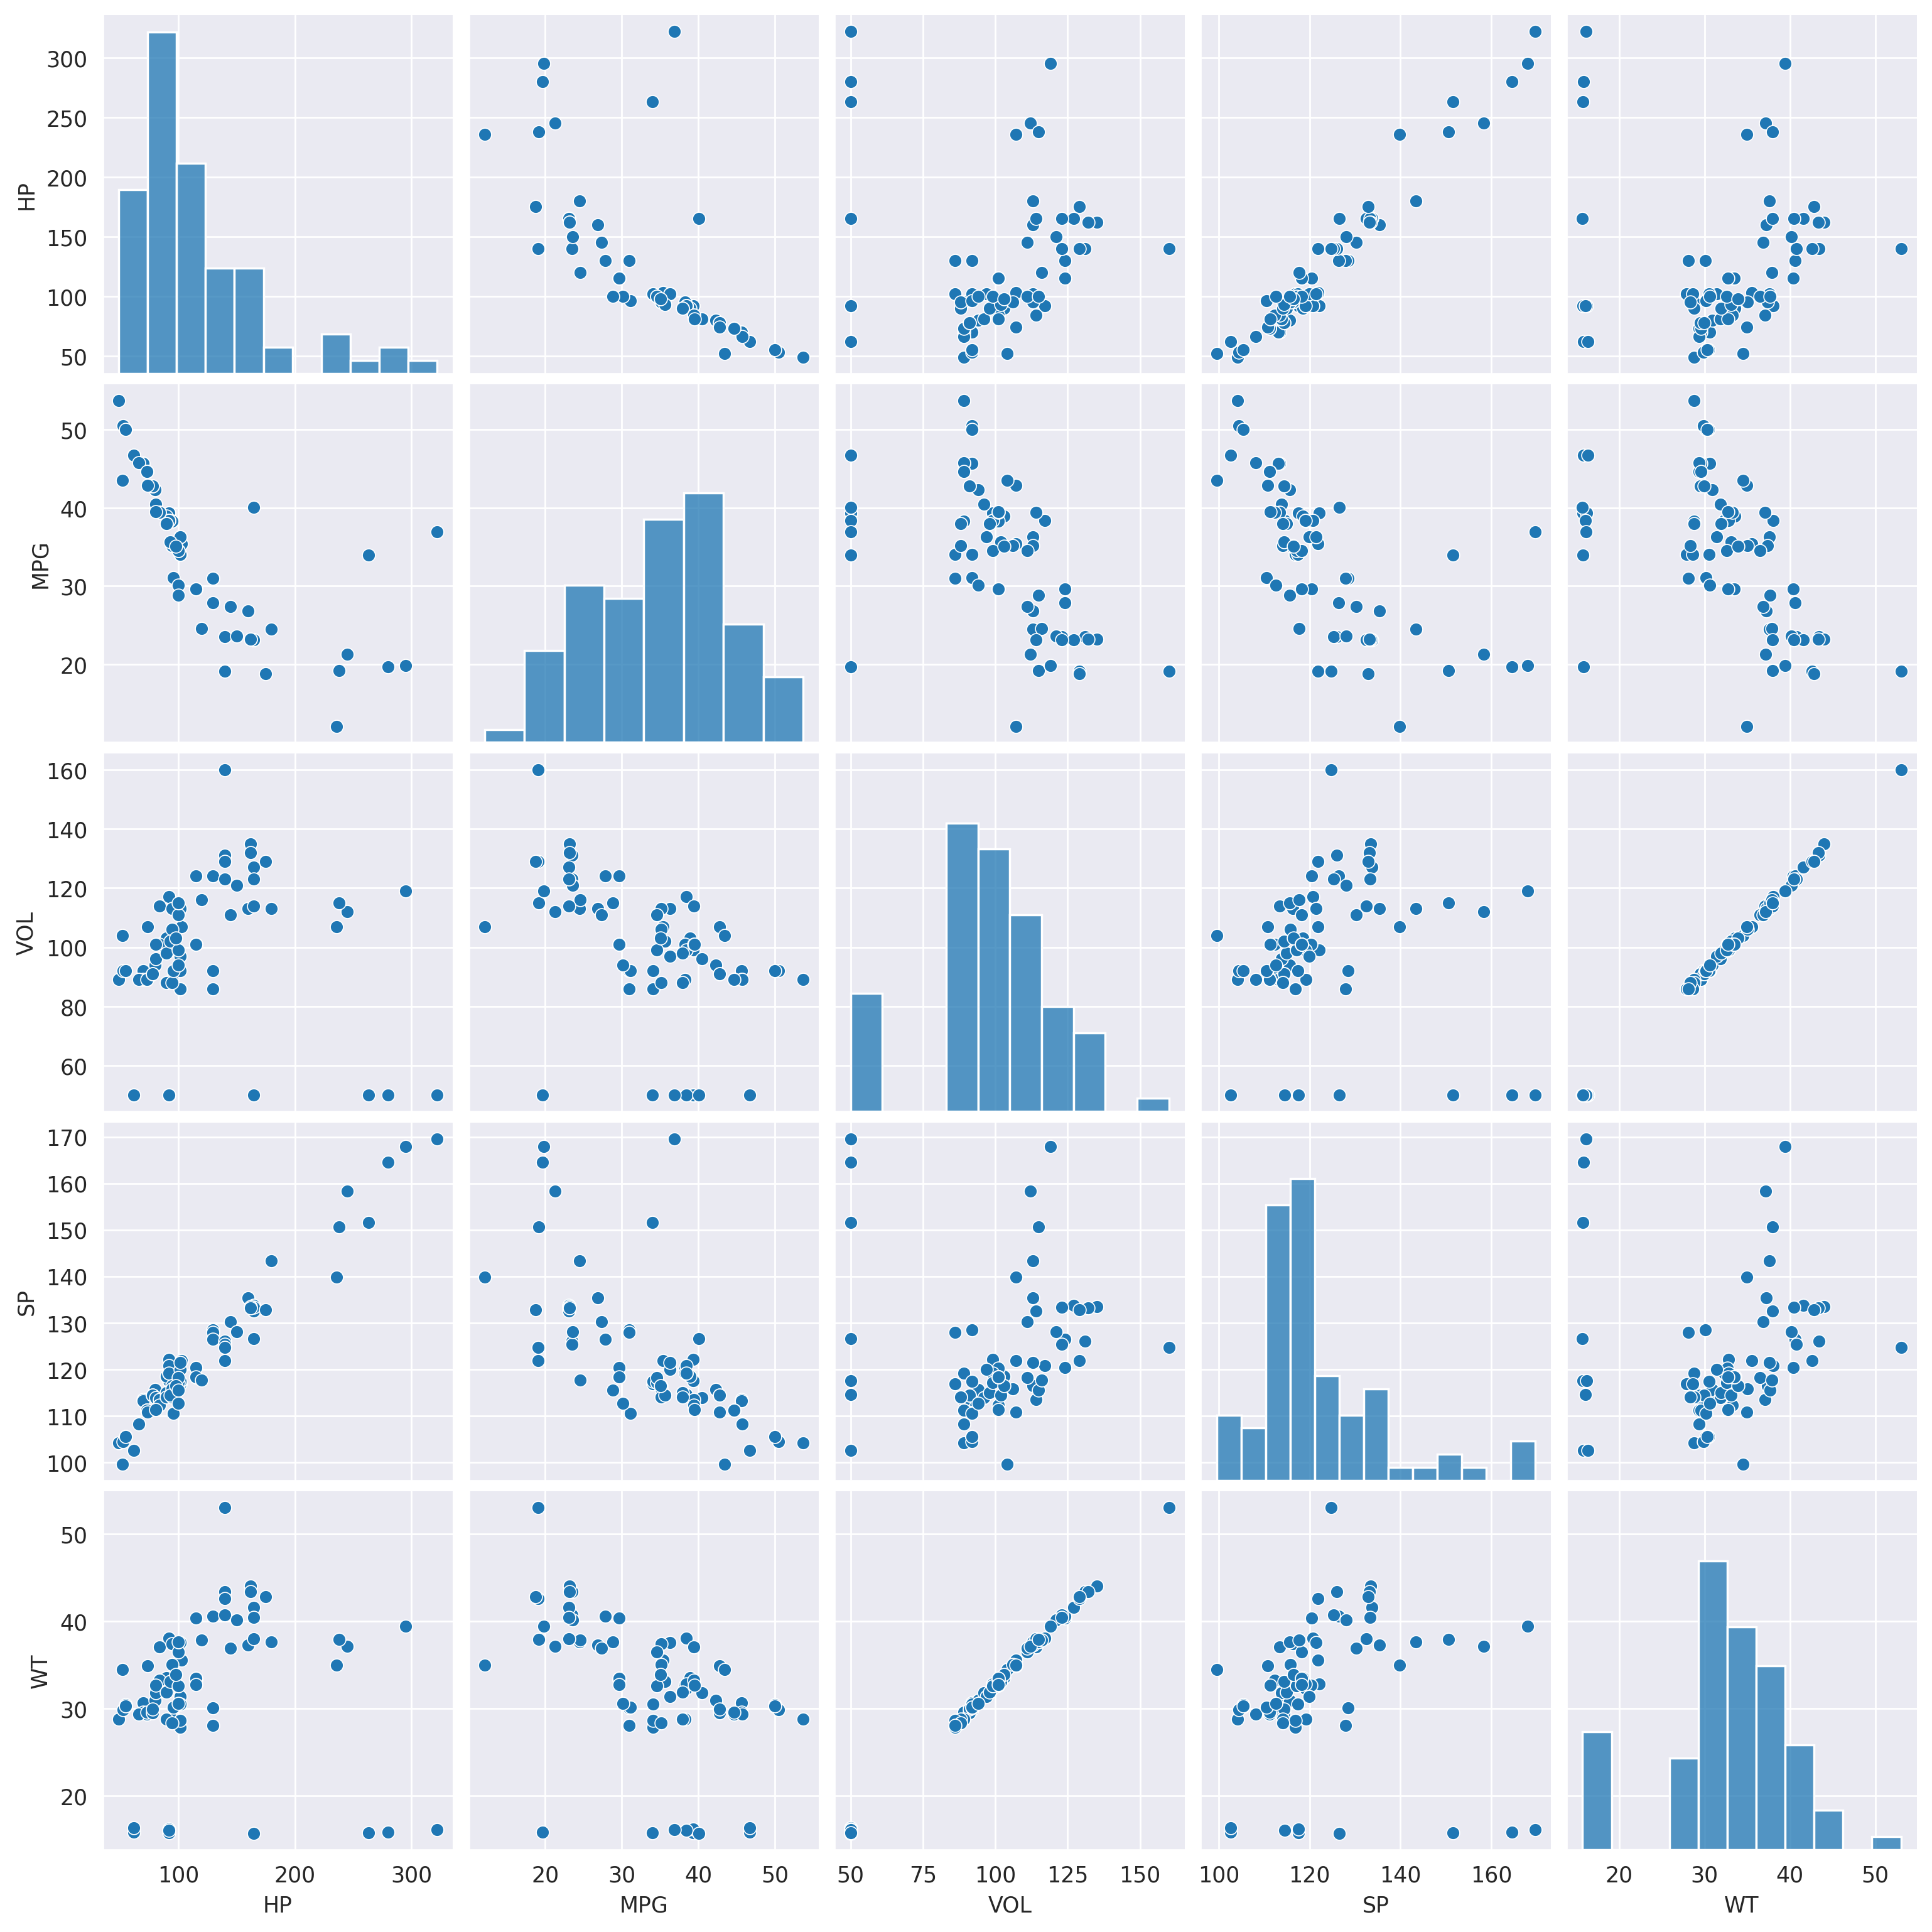

In [5]:
sns.pairplot(df)

MOdel Building

In [6]:
import statsmodels.formula.api as smf

In [7]:
model = smf.ols('MPG~WT+VOL+SP+HP',data=df).fit()

In [8]:
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [9]:
#wt
wt = smf.ols("MPG~WT+SP+HP",data=df).fit()
wt.pvalues

Intercept    5.053995e-02
WT           1.914892e-13
SP           1.089096e-02
HP           7.560276e-07
dtype: float64

In [10]:
#vol
VOL = smf.ols("MPG~VOL+SP+HP",data=df).fit()
VOL.pvalues

Intercept    4.194554e-02
VOL          1.648229e-13
SP           1.207855e-02
HP           8.644870e-07
dtype: float64

# *calculate vif*

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [13]:
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]

In [14]:
vif["feattures"]=df.columns

In [15]:
vif

,vif,feattures
0,78.924966,HP
1,63.516923,MPG
2,12712.450299,VOL
3,435.167395,SP
4,12179.435286,WT


# SUBSET **selection**

In [16]:
#vol
vol = smf.ols("MPG~HP+SP+VOL",data=df).fit()
vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.56e-24
Time:                        05:54:28   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
SP             0.4007      0.156      2.571      0.012       0.090       0.711
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
WT = smf.ols("MPG~HP+SP+WT",data=df).fit()
WT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     85.68
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.81e-24
Time:                        05:54:28   Log-Likelihood:                -234.15
No. Observations:                  81   AIC:                             476.3
Df Residuals:                      77   BIC:                             485.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7848     14.490      1.986      0.051      -0.069      57.639
HP            -0.2085      0.039     -5.386      0.000      -0.286      -0.131
SP             0.4078      0.156      2.609      0.011       0.097       0.719
WT            -0.5994      0.067     -8.895      0.000      -0.734      -0.465
==============================================================================
Omnibus:                       10.924   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.048
Skew:                           0.705   Prob(JB):                      0.00242
Kurtosis:                       4.257   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model validation Technique

In [ ]:
#1.RESIDUAL ANALYSIS

In [18]:
#statement
import statsmodels.api as sm

In [19]:
vol.resid

0     10.109912
1      7.756607
2      7.756607
3      3.334825
4      8.234688
        ...    
76    15.666857
77     1.330162
78     7.783144
79     7.596179
80    -3.491695
Length: 81, dtype: float64

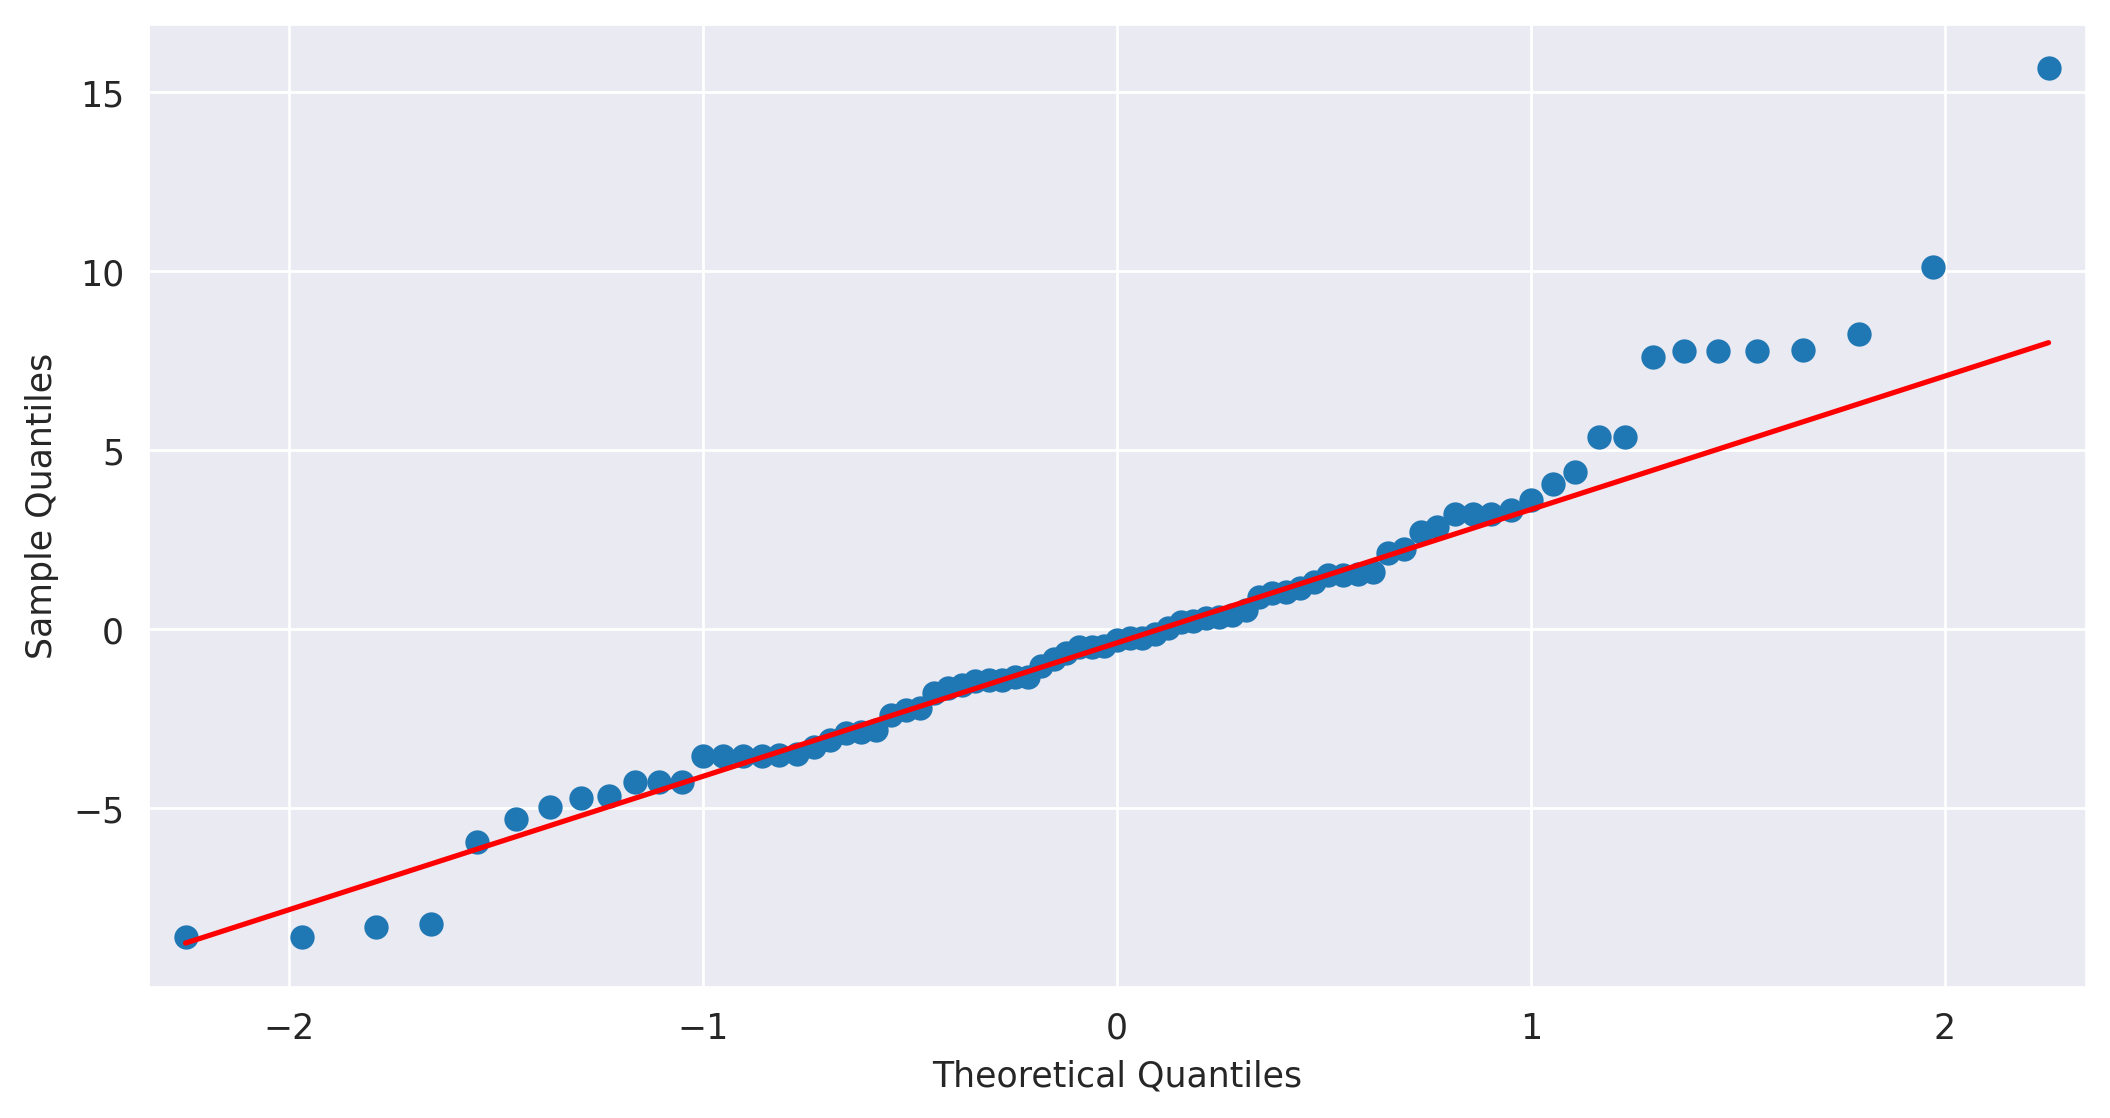

In [21]:
# qq plot
sm.qqplot(vol.resid,line="q");

In [23]:
#get index for higher residual
nm.where(vol.resid>10)

(array([ 0, 76]),)

In [ ]:
#2.Residual PLot Or Homoscedasticity

Text(0, 0.5, 'Resid')

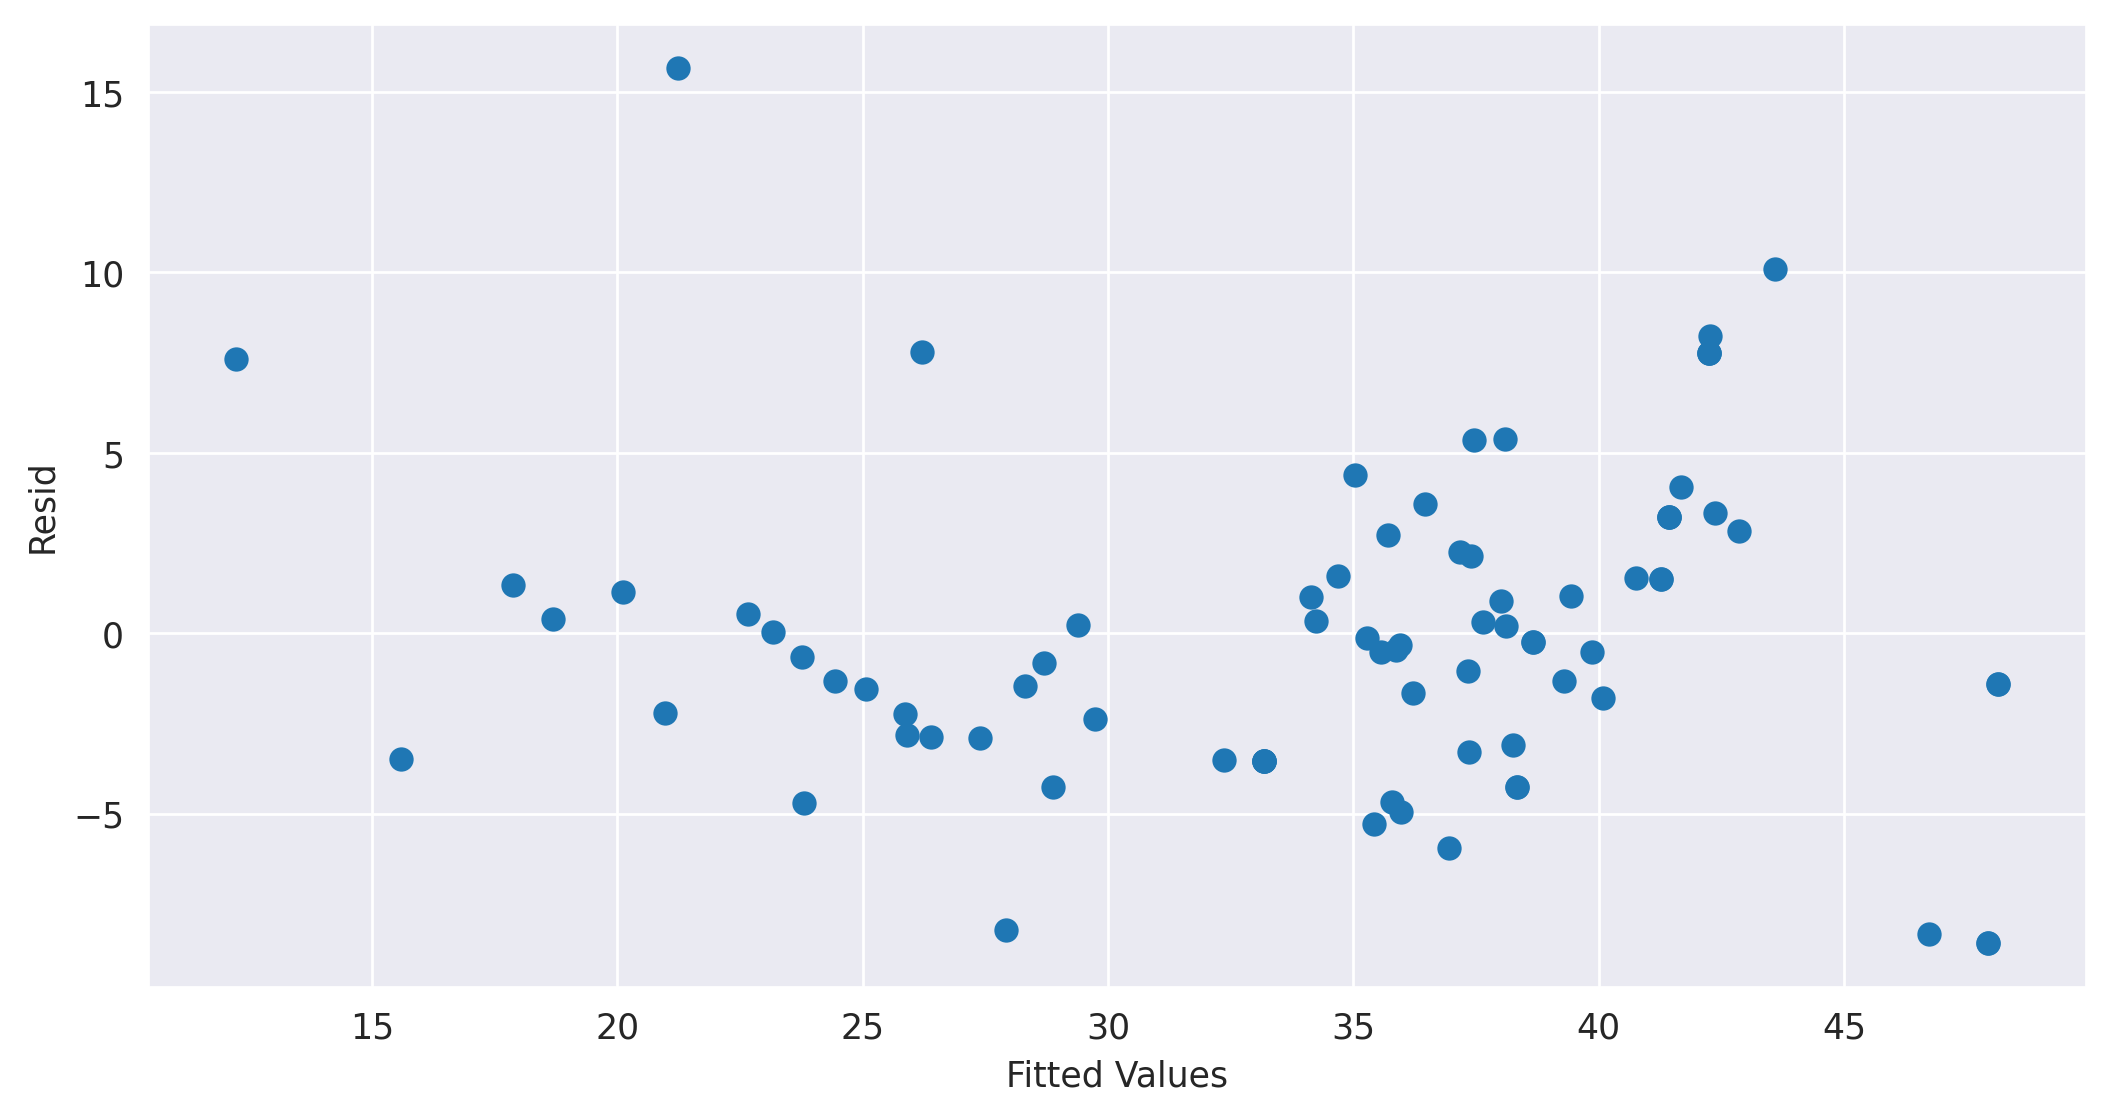

In [24]:
plt.scatter(vol.fittedvalues,vol.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Resid")

In [ ]:
#3.residual vs regressor

eval_env: 1


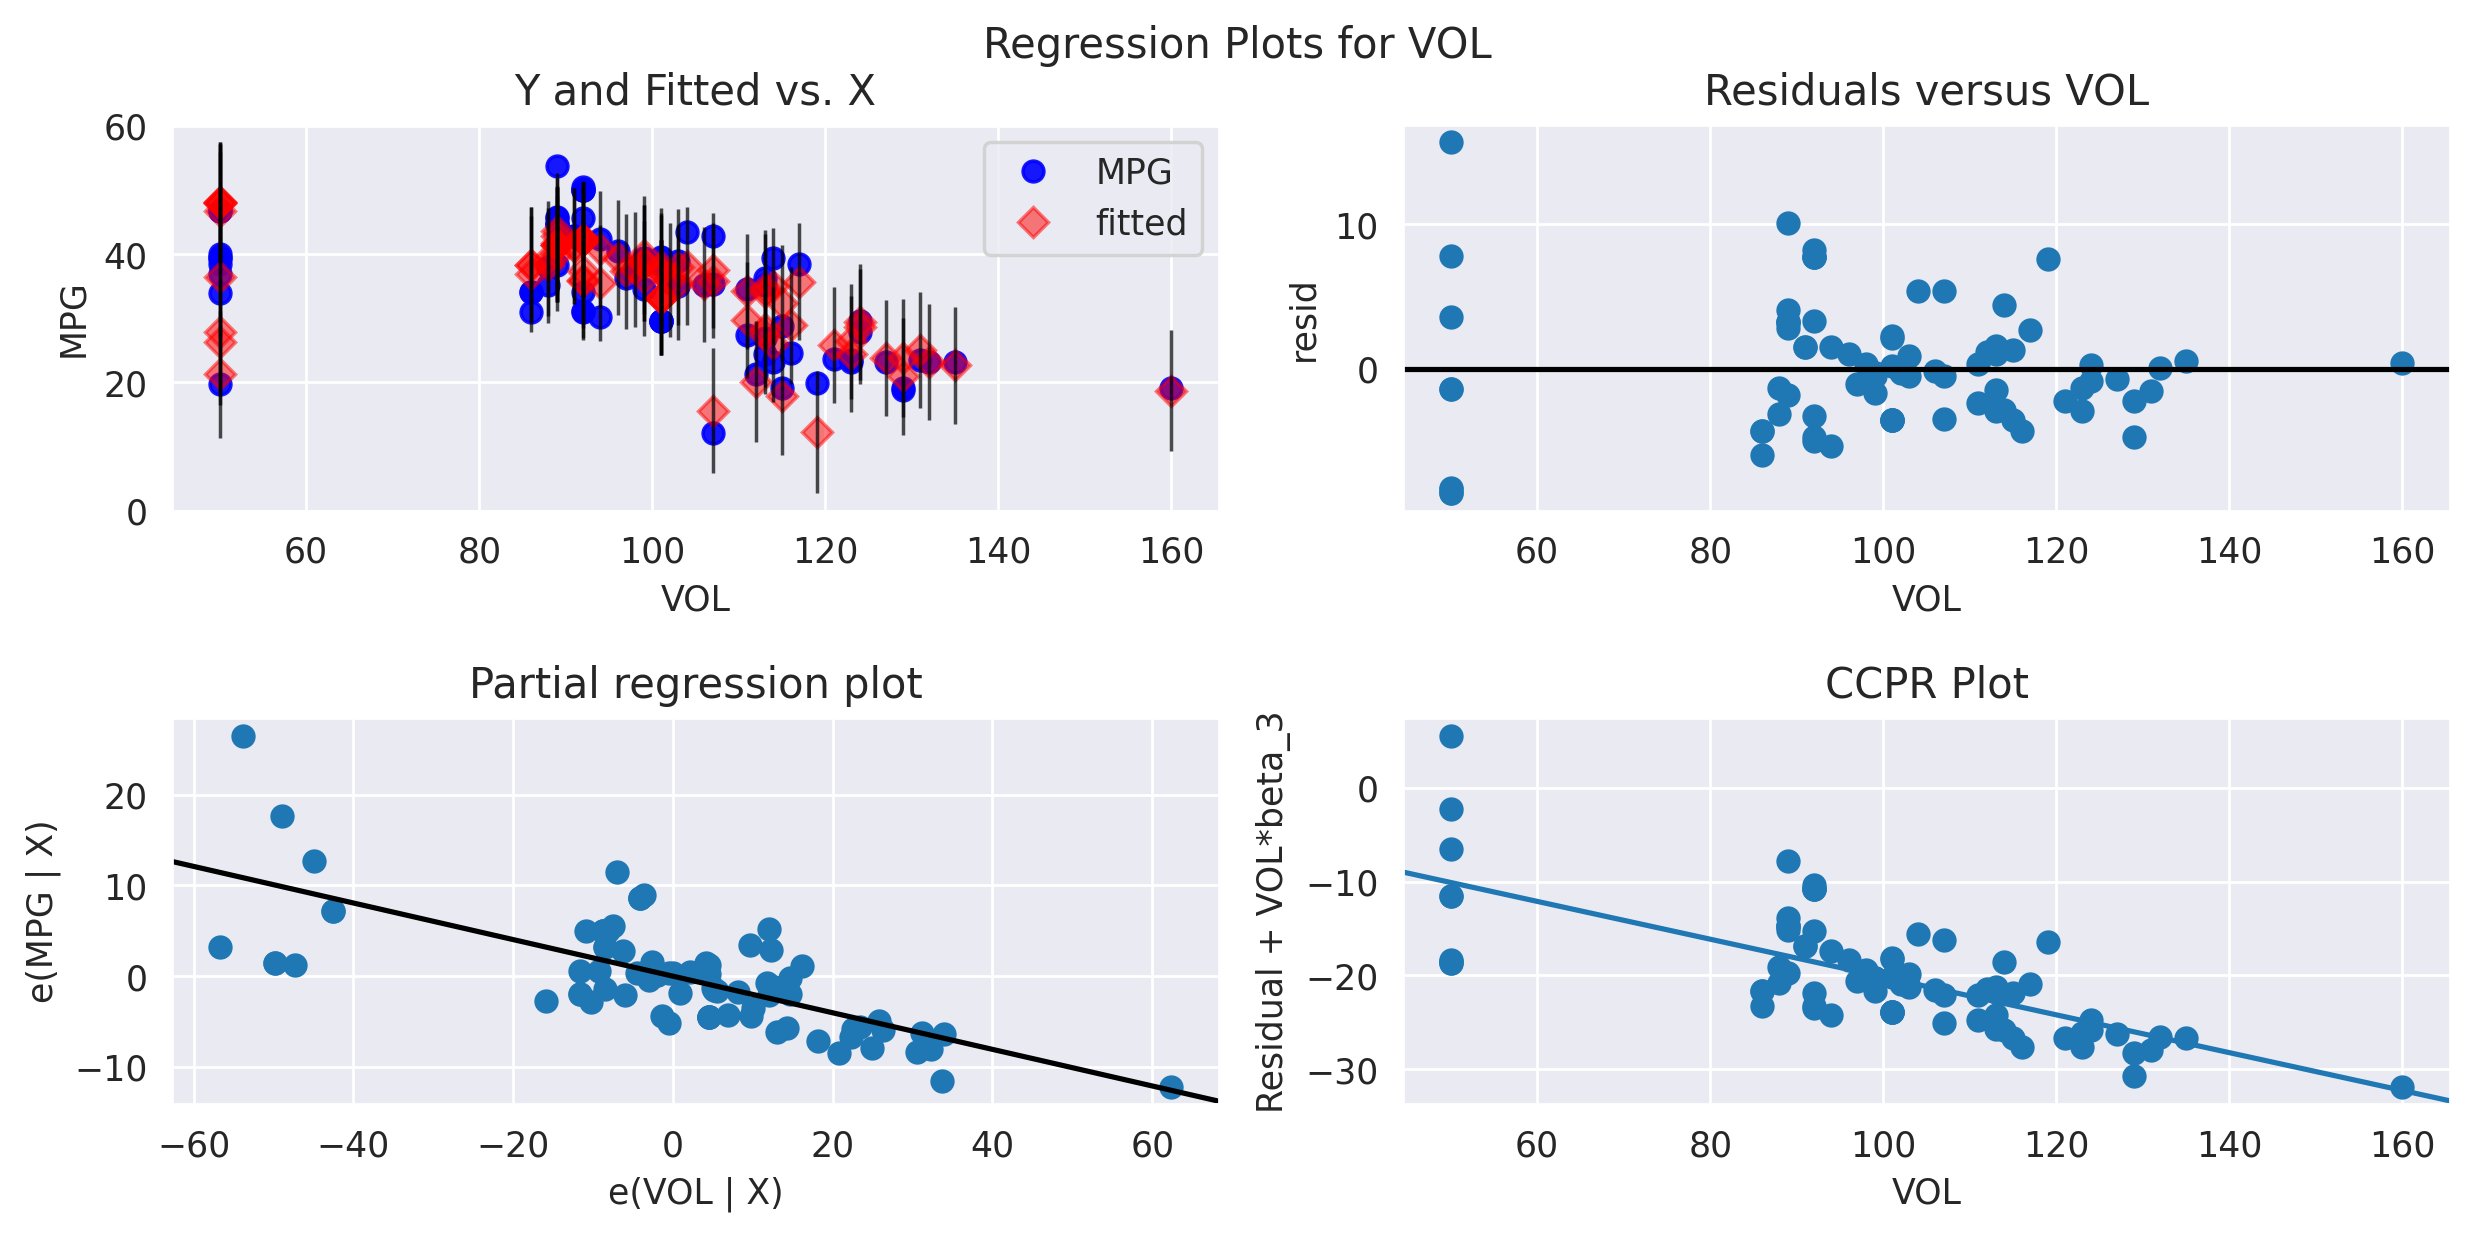

In [25]:
#vol
sm.graphics.plot_regress_exog(vol,"VOL");

eval_env: 1


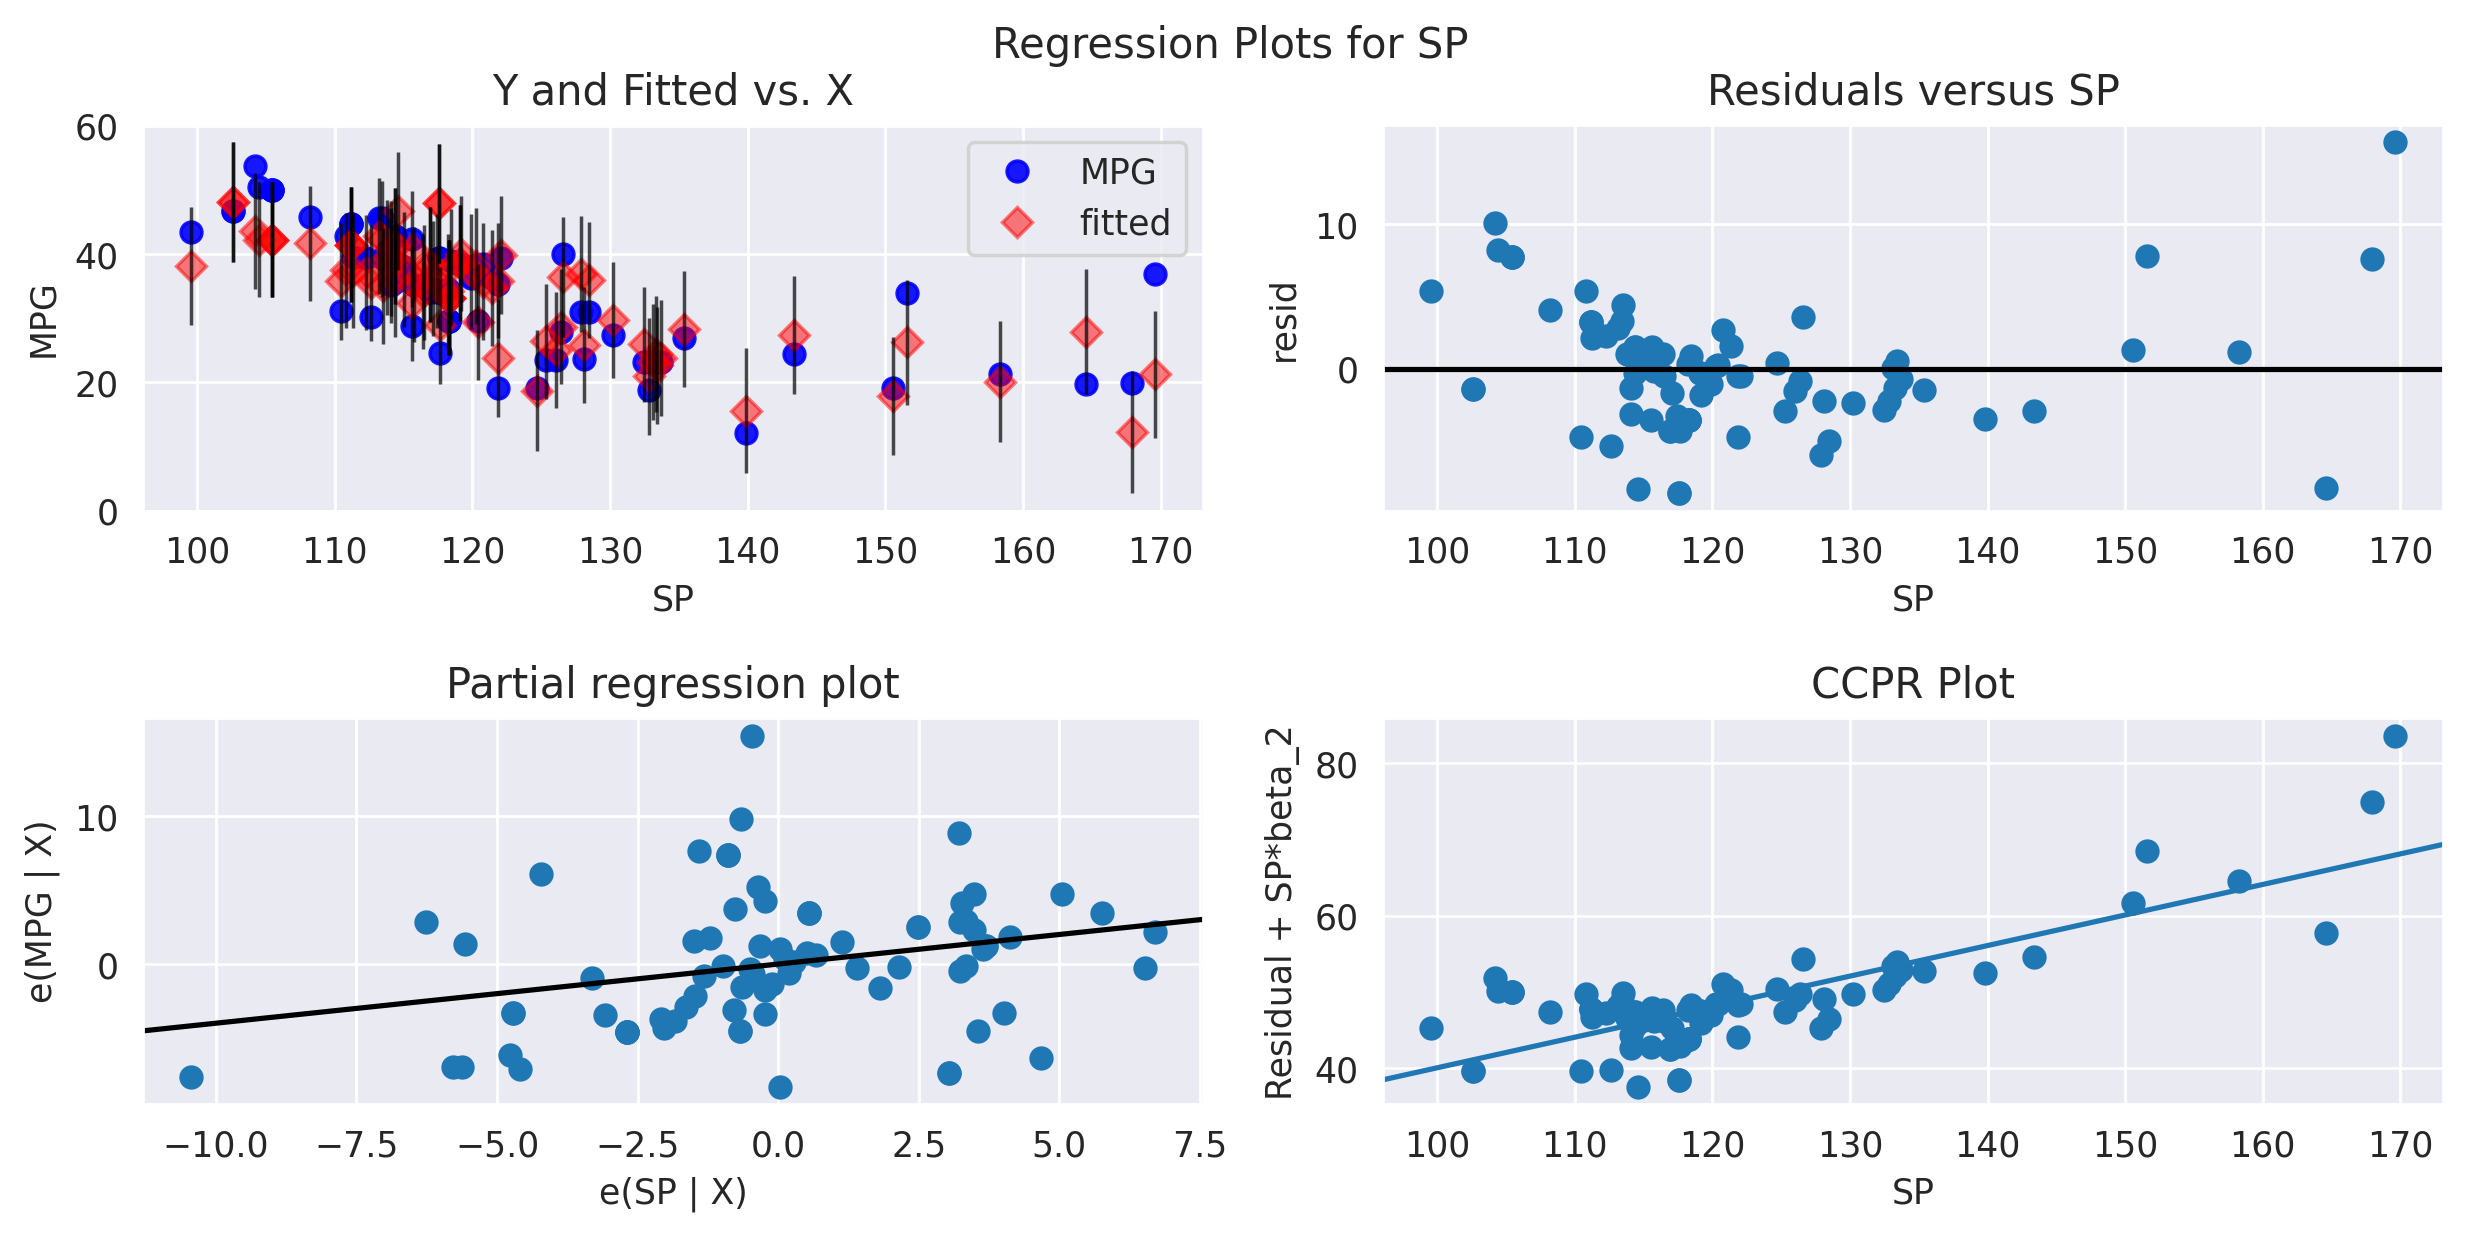

In [26]:
#SP
sm.graphics.plot_regress_exog(vol,"SP");

eval_env: 1


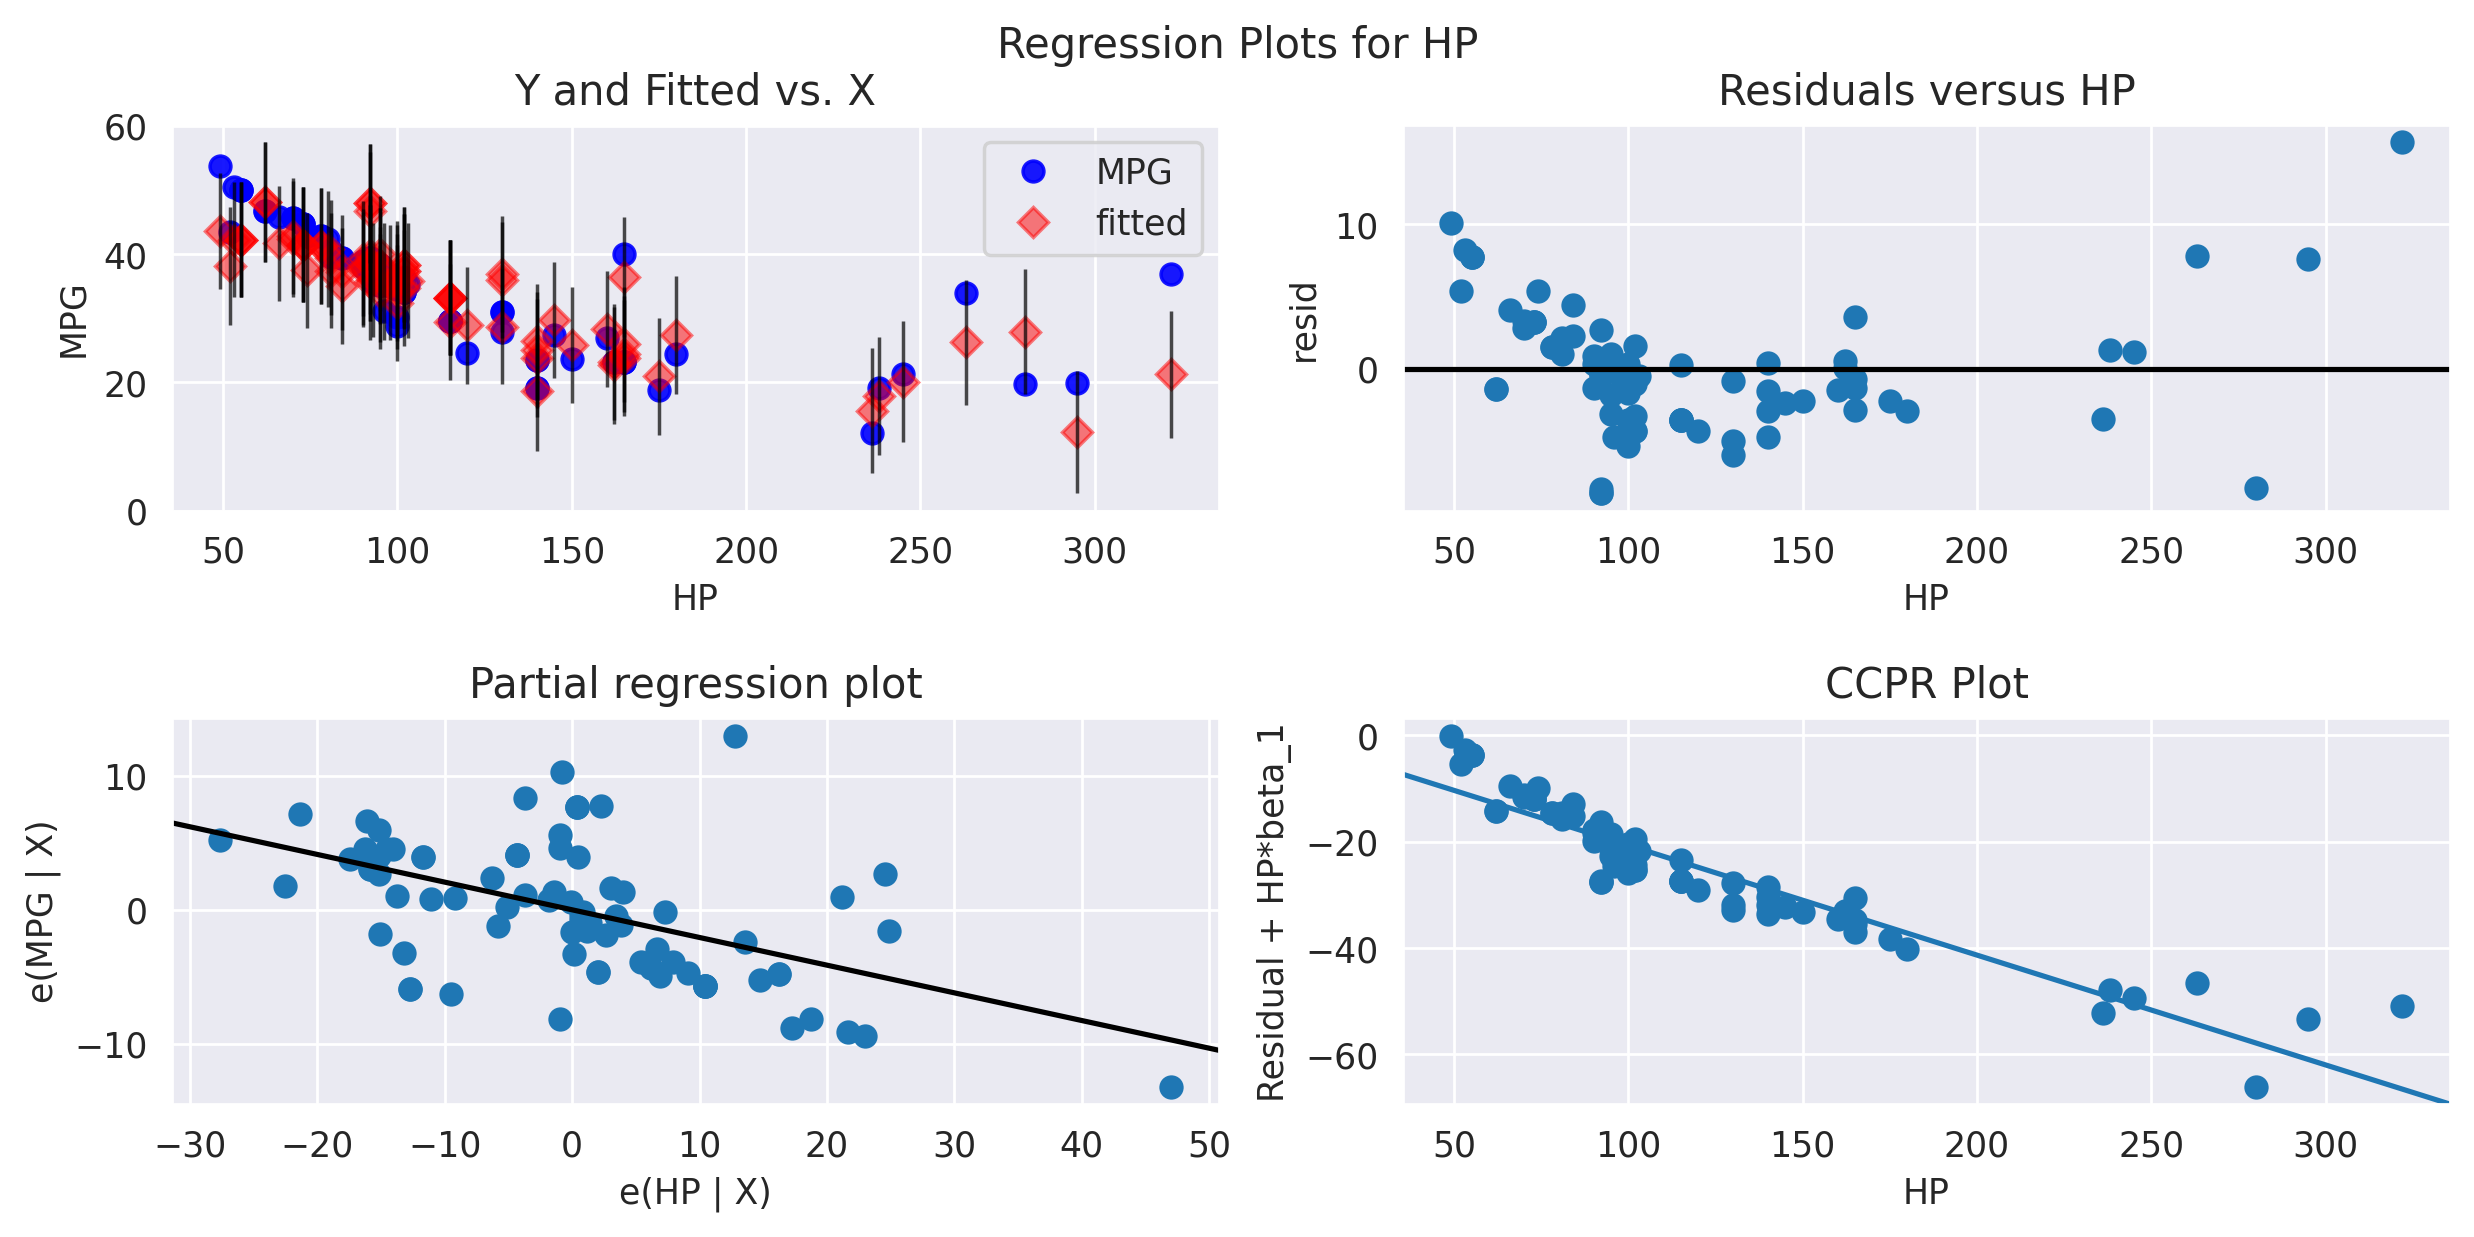

In [27]:
#hp
sm.graphics.plot_regress_exog(vol,"HP");

MODEL DELETION TECHNIQUE

cook's distance

In [ ]:
#deleting influence and outlier

In [29]:
model = smf.ols("MPG~VOL+HP+SP",data=df).fit()

In [30]:
inf=model.get_influence()#find the influence data
c,p=inf.cooks_distance#find cooks distance

Text(0.5, 1.0, "cook's distance")

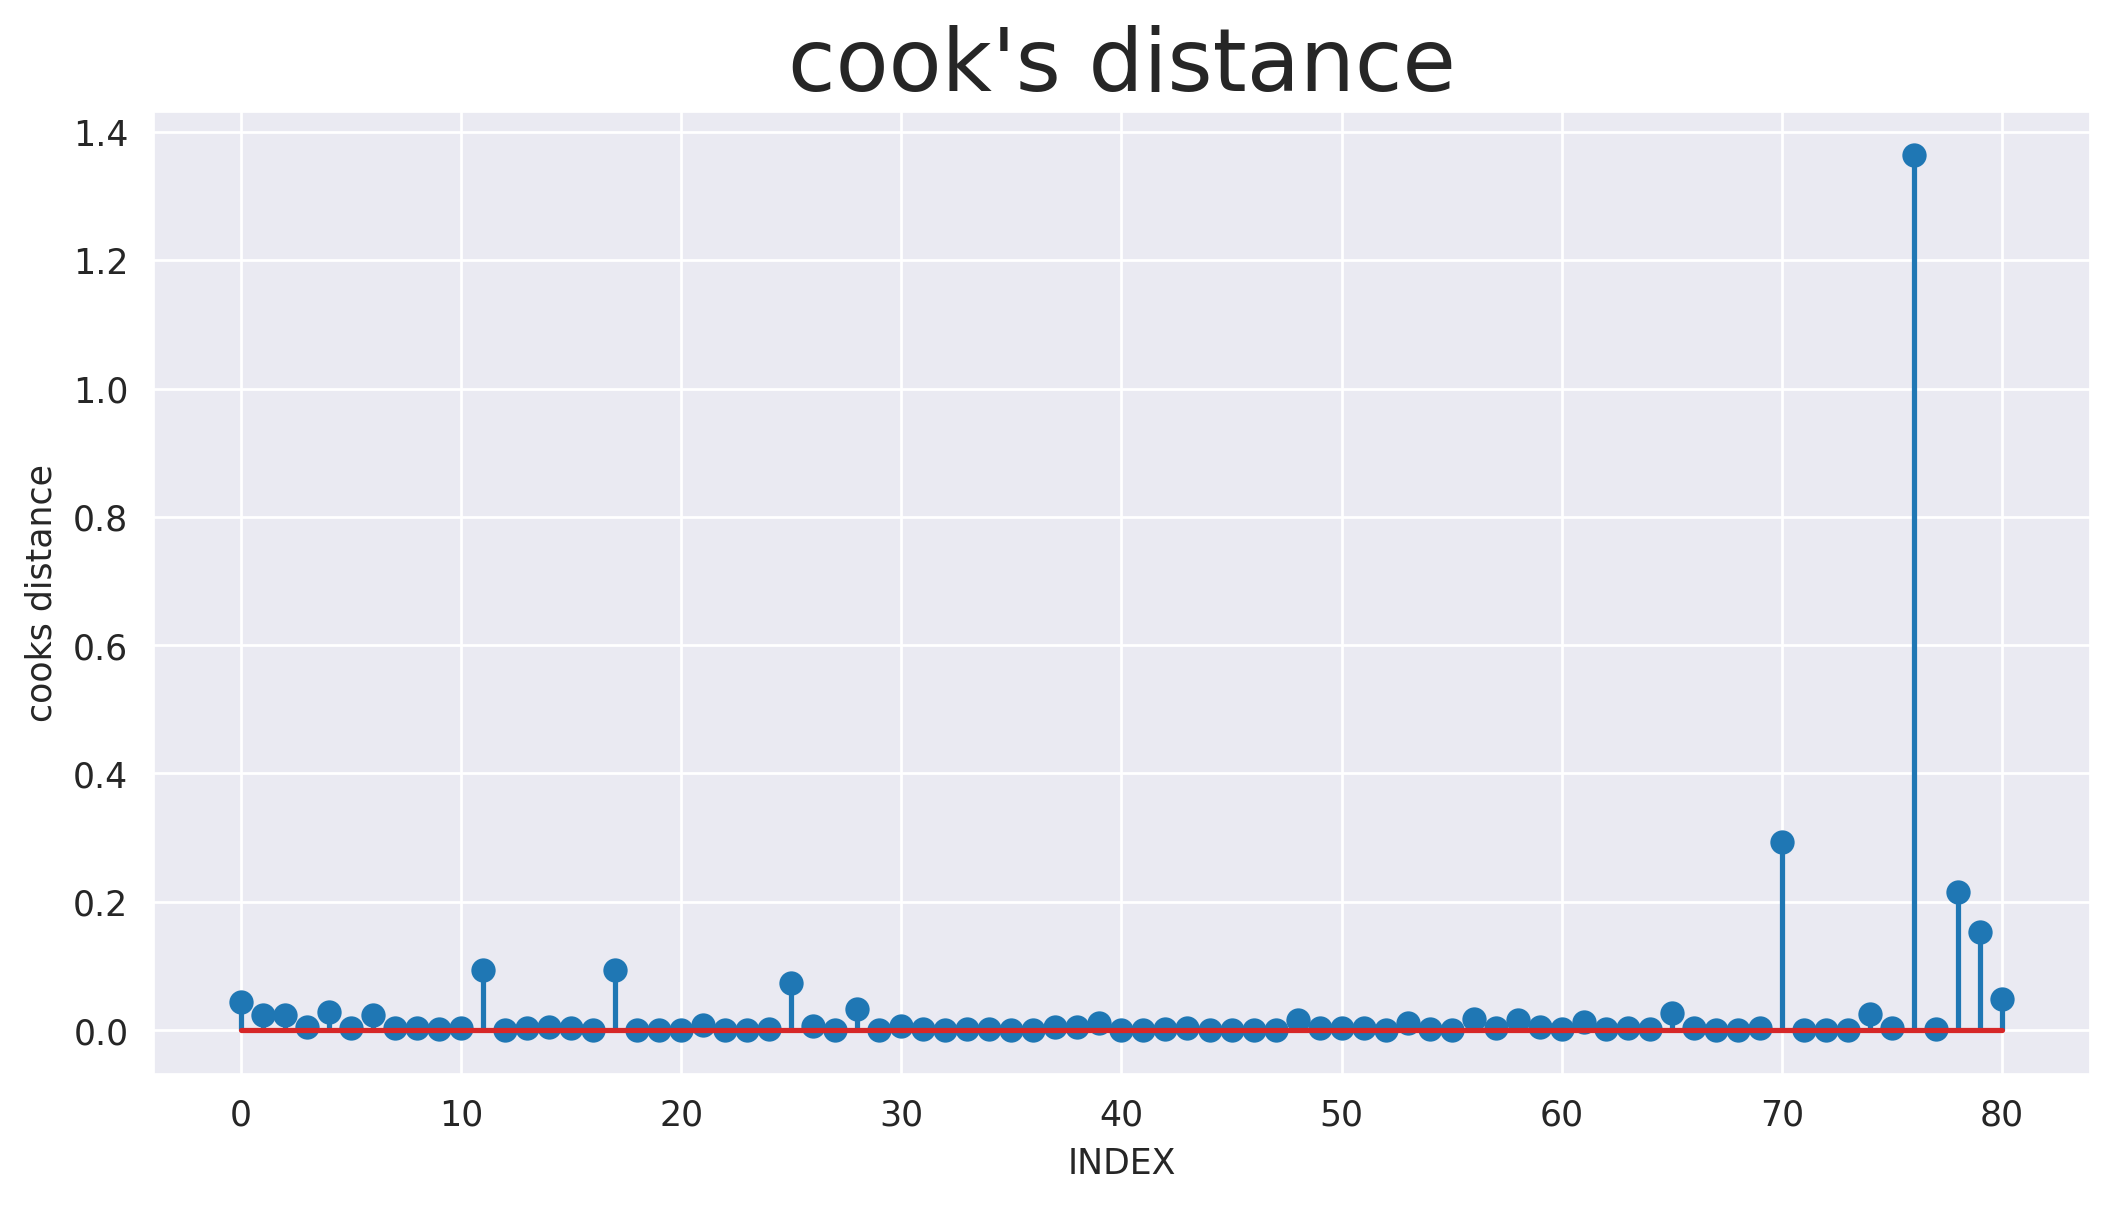

In [31]:
plt.stem(c)
plt.xlabel("INDEX")
plt.ylabel("cooks distance")
plt.title("cook's distance",size=25)

In [37]:
nm.argmax(c),nm.max(c)

(76, 1.3641743869103418)

In [38]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [39]:
df.iloc[[76]]

,HP,MPG,VOL,SP,WT
76,322,36.9,50,169.598513,16.132947


In [ ]:
#influence plot

In [40]:
from statsmodels.graphics.regressionplots import influence_plot

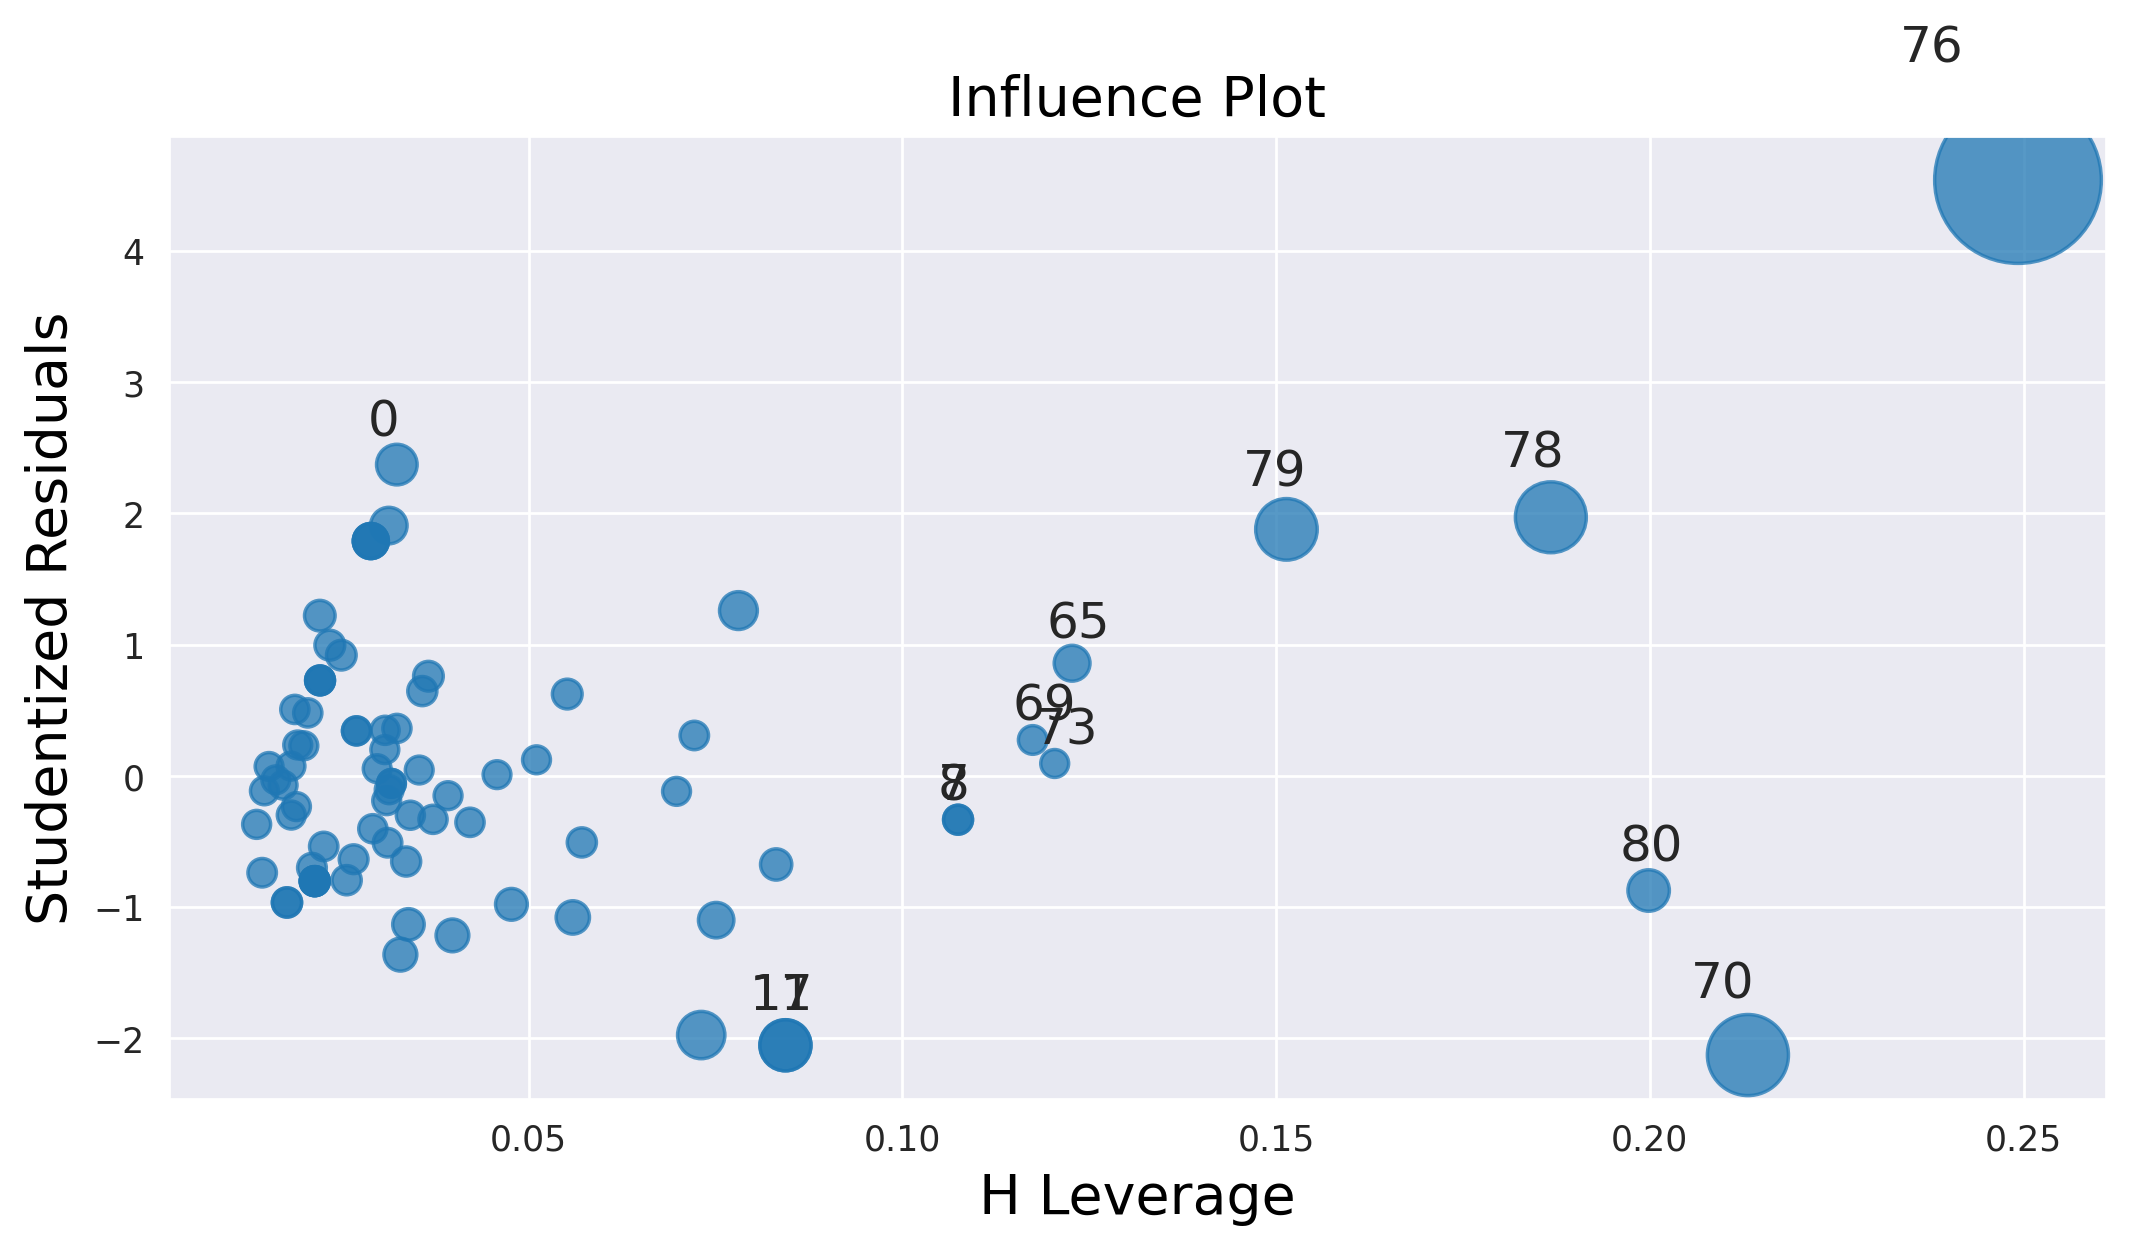

In [41]:
influence_plot(model);

In [42]:
#calculation cutoff
k = len(df.columns)
n = len(df)

leaverage_cutoff = 3*(k+1)/n
leaverage_cutoff

0.2222222222222222

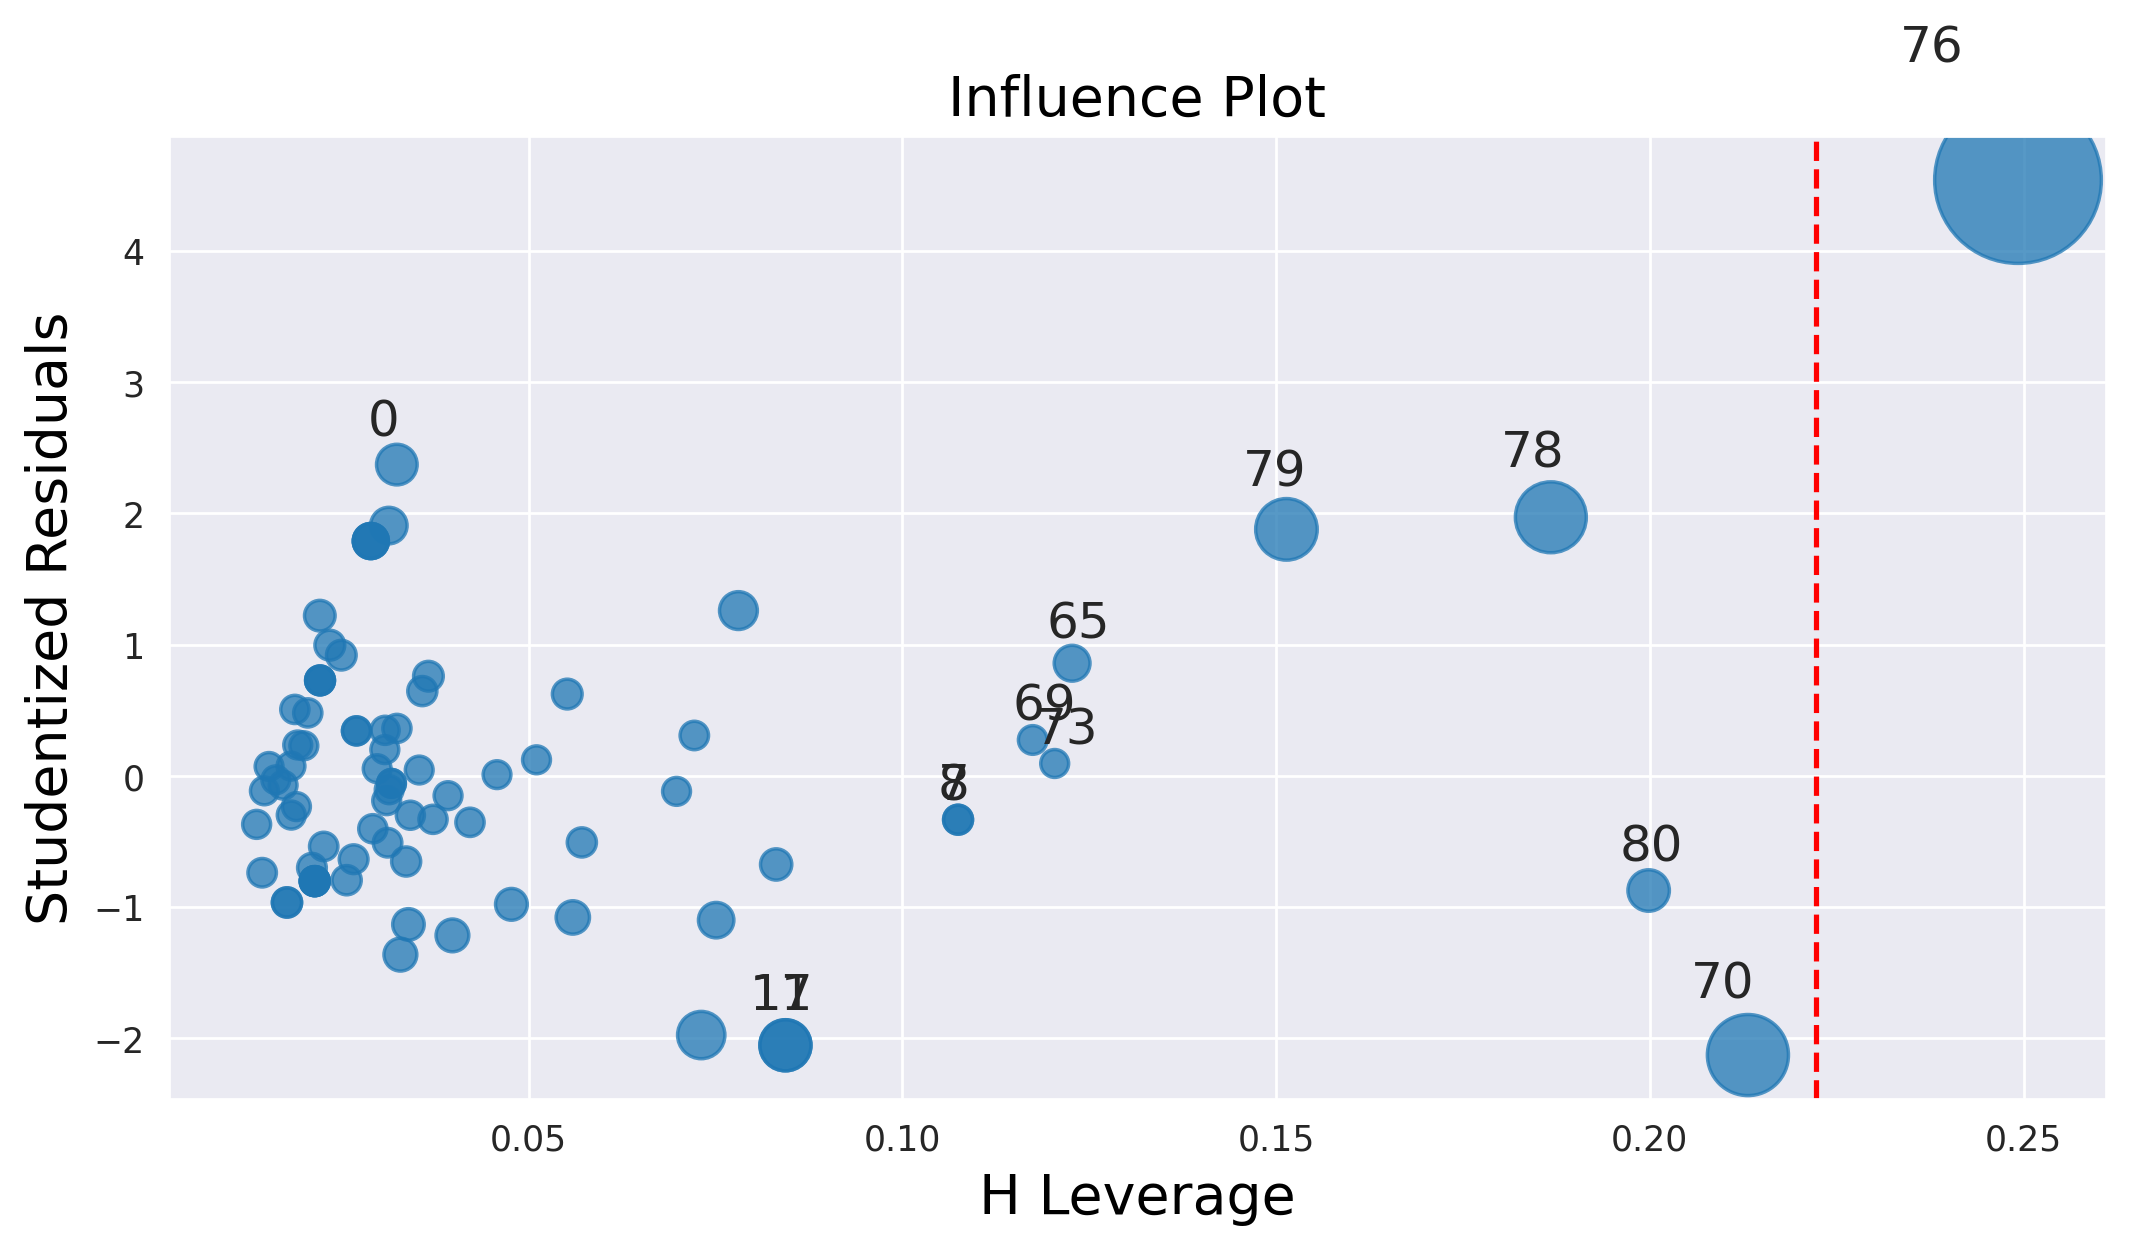

In [43]:
influence_plot(model)
plt.axvline(leaverage_cutoff,linestyle="--",color="red")

IMproving the *model*

In [44]:
df.drop(index=[76],inplace=True)

In [45]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
#reset the index

In [46]:
df.reset_index(inplace=True)

In [47]:
df

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
75,75,175,18.762837,129,132.864163,42.778219
76,77,238,19.197888,115,150.576579,37.923113
77,78,263,34.000000,50,151.598513,15.769625
78,79,295,19.833733,119,167.944460,39.423099


In [48]:
df.drop(columns=["index"],inplace=True)

In [49]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
76,238,19.197888,115,150.576579,37.923113
77,263,34.000000,50,151.598513,15.769625
78,295,19.833733,119,167.944460,39.423099


In [50]:
model=smf.ols("MPG~VOL+SP+HP",data=df).fit()

In [51]:
inf=model.get_influence()
c,p=inf.cooks_distance

Text(0.5, 1.0, "cook's distance")

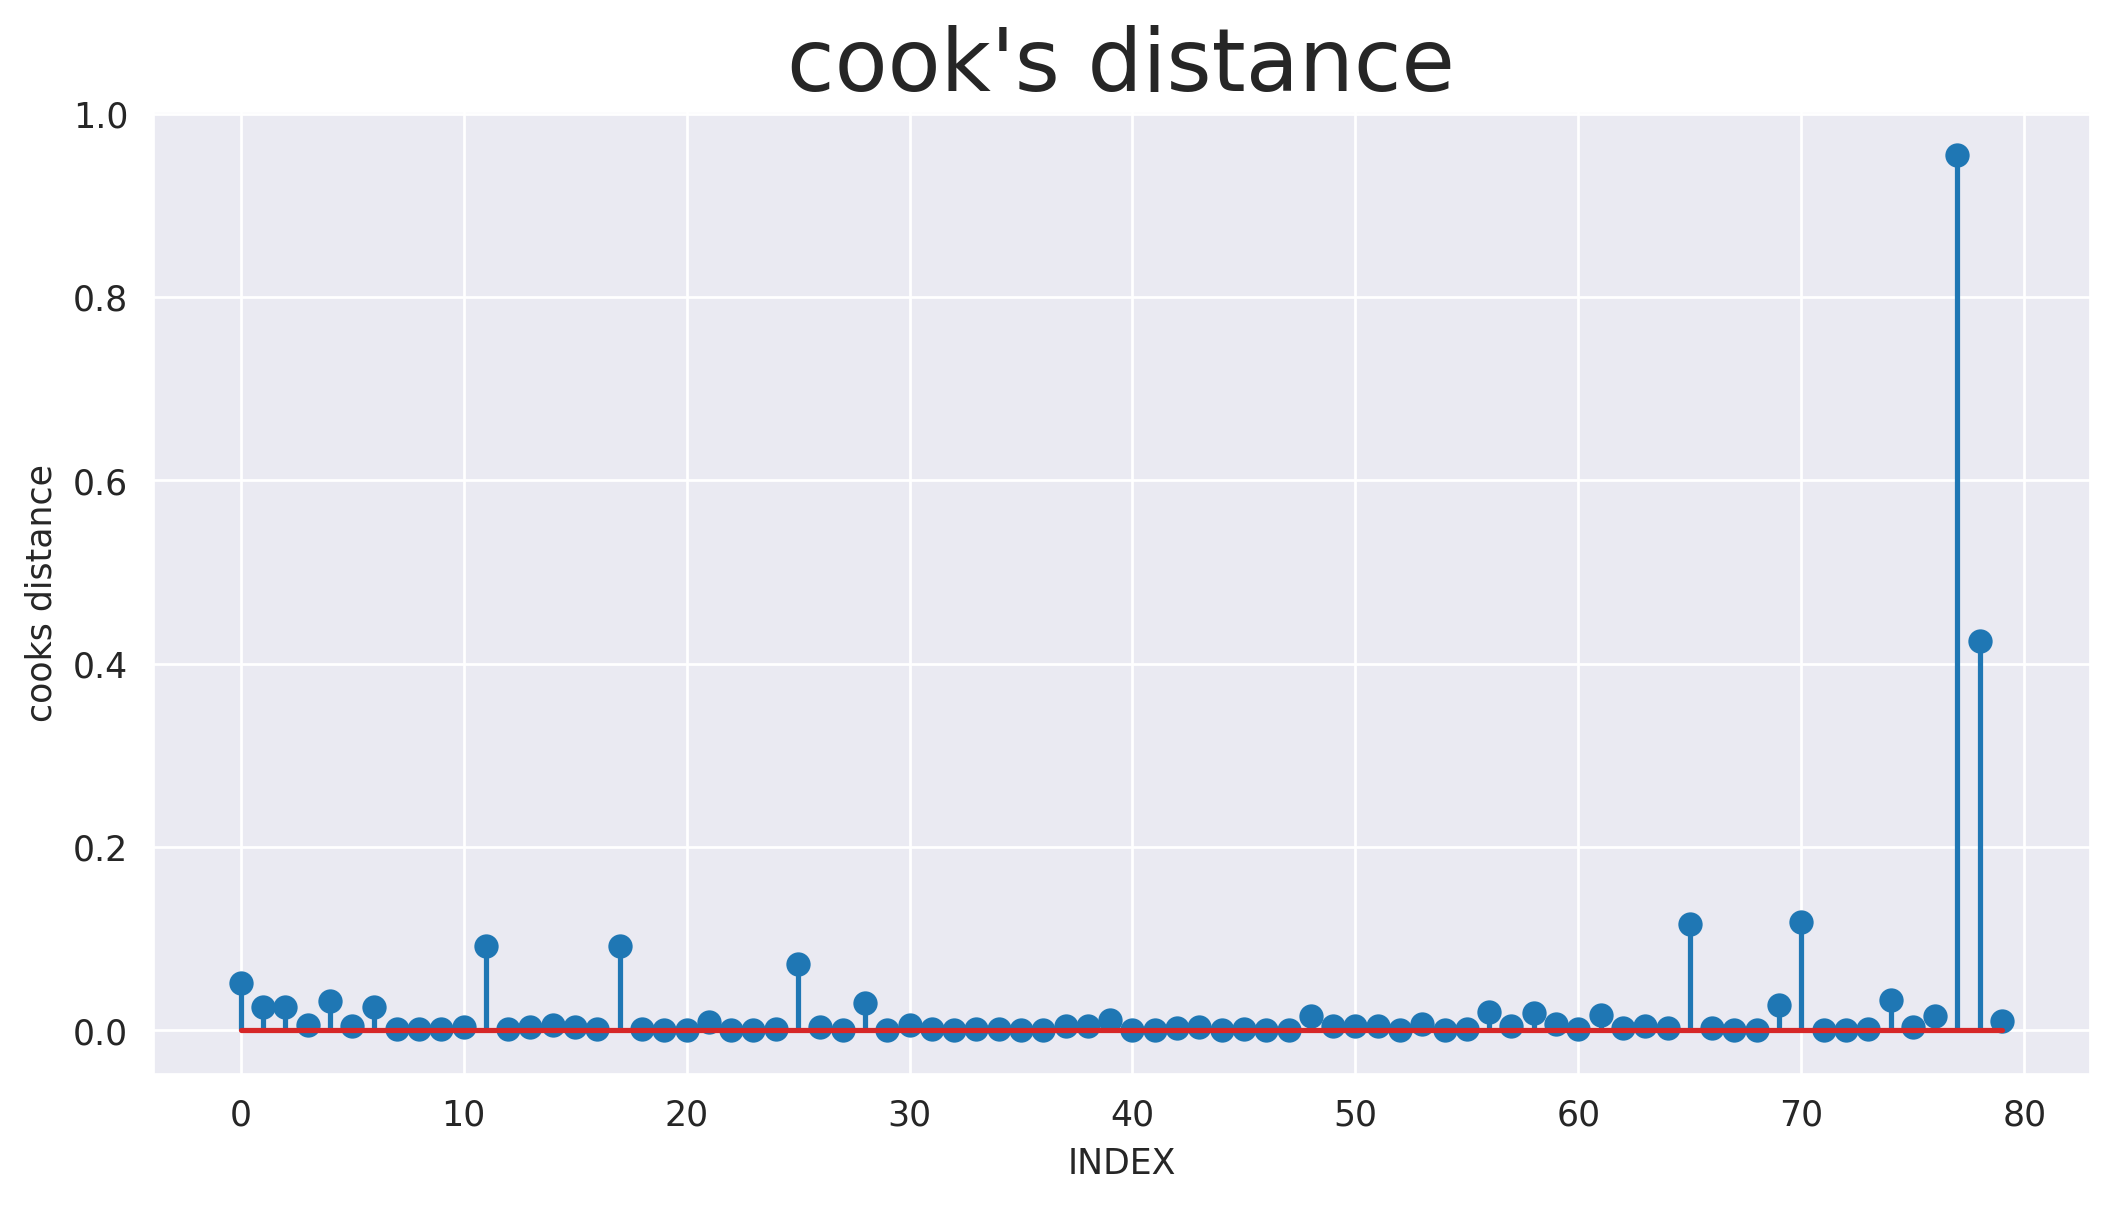

In [52]:
plt.stem(c)
plt.xlabel("INDEX")
plt.ylabel("cooks distance")
plt.title("cook's distance",size=25)

In [54]:
nm.argmax(c),nm.max(c)

(77, 0.9548691936312454)

In [56]:
df.columns
df.head(3)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597


In [57]:
#final model
model

In [60]:
newdf = pd.DataFrame({
    "VOL":[90,98,95],
    "SP":[100,110,152],
    "HP":[95,75,52]
})
newdf

,VOL,SP,HP
0,90,100,95
1,98,110,75
2,95,152,52


In [61]:
model.predict(newdf)

0    31.892336
1    39.168355
2    62.221671
dtype: float64

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     114.8
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           3.78e-28
Time:                        06:23:07   Log-Likelihood:                -222.00
No. Observations:                  80   AIC:                             452.0
Df Residuals:                      76   BIC:                             461.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.7555     12.922      2.148      0.035       2.018      53.493
VOL           -0.1729      0.021     -8.178      0.000      -0.215      -0.131
SP             0.4124      0.139      2.963      0.004       0.135       0.690
HP            -0.2268      0.035     -6.525      0.000      -0.296      -0.158
==============================================================================
Omnibus:                        9.859   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.686
Skew:                           0.767   Prob(JB):                      0.00788
Kurtosis:                       3.742   Cond. No.                     5.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""